In [255]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import calendar
from datetime import datetime

In [256]:
train=pd.read_csv('bike-sharing-demand/train.csv')
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [400]:
test=pd.read_csv('bike-sharing-demand/test.csv')
test

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014
...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981


In [258]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [259]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [260]:
'''
train.datetime.astype('datetime64').dt.year
train.datetime.astype('datetime64').dt.month
train.datetime.astype('datetime64').dt.day
'''

"\ntrain.datetime.astype('datetime64').dt.year\ntrain.datetime.astype('datetime64').dt.month\ntrain.datetime.astype('datetime64').dt.day\n"

In [261]:
train['datetime'].apply(lambda x:str(x).split(' ')[0].split('-'))

0        [2011, 01, 01]
1        [2011, 01, 01]
2        [2011, 01, 01]
3        [2011, 01, 01]
4        [2011, 01, 01]
              ...      
10881    [2012, 12, 19]
10882    [2012, 12, 19]
10883    [2012, 12, 19]
10884    [2012, 12, 19]
10885    [2012, 12, 19]
Name: datetime, Length: 10886, dtype: object

In [262]:
#데이트타임을 문자열로 읽어온 후 데이트타임 타입으로 변경
train['TempDate']=train.datetime.apply(lambda x:x.split())
train['TempDate']

0        [2011-01-01, 00:00:00]
1        [2011-01-01, 01:00:00]
2        [2011-01-01, 02:00:00]
3        [2011-01-01, 03:00:00]
4        [2011-01-01, 04:00:00]
                  ...          
10881    [2012-12-19, 19:00:00]
10882    [2012-12-19, 20:00:00]
10883    [2012-12-19, 21:00:00]
10884    [2012-12-19, 22:00:00]
10885    [2012-12-19, 23:00:00]
Name: TempDate, Length: 10886, dtype: object

In [263]:
train['year']=train.TempDate.apply(lambda x: x[0].split('-')[0])
train['month']=train.TempDate.apply(lambda x: x[0].split('-')[1])
train['day']=train.TempDate.apply(lambda x: x[0].split('-')[2])
train['hour']=train.TempDate.apply(lambda x : x[1].split(':')[0])

In [264]:
#파일 읽어올때 데이트타임 타입으로 읽어오기
df=pd.read_csv('bike-sharing-demand/train.csv', parse_dates=['datetime'])
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [266]:
df['datetime'].dt.year

0        2011
1        2011
2        2011
3        2011
4        2011
         ... 
10881    2012
10882    2012
10883    2012
10884    2012
10885    2012
Name: datetime, Length: 10886, dtype: int64

In [267]:
list(calendar.day_name)

['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [268]:
list(calendar.day_abbr)

['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

In [269]:
calendar.day_name[1]

'Tuesday'

In [270]:
import locale

In [271]:
locale.setlocale(locale.LC_ALL, 'korean')

'Korean_Korea.949'

In [272]:
list(calendar.day_name)

['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일']

In [273]:
locale.setlocale(locale.LC_ALL, 'de_DE')

'de_DE'

In [274]:
list(calendar.day_name)

['Montag',
 'Dienstag',
 'Mittwoch',
 'Donnerstag',
 'Freitag',
 'Samstag',
 'Sonntag']

In [275]:
datetime.today()

datetime.datetime(2023, 10, 20, 16, 55, 35, 245580)

In [276]:
s = pd.Series(pd.date_range("2023-10-20", periods=10, freq="D"))
s

0   2023-10-20
1   2023-10-21
2   2023-10-22
3   2023-10-23
4   2023-10-24
5   2023-10-25
6   2023-10-26
7   2023-10-27
8   2023-10-28
9   2023-10-29
dtype: datetime64[ns]

In [277]:
s.dt.weekday

0    4
1    5
2    6
3    0
4    1
5    2
6    3
7    4
8    5
9    6
dtype: int64

In [278]:
list(calendar.day_name)[s.dt.weekday.iloc[0]]

'Freitag'

In [279]:
s.dt.year

0    2023
1    2023
2    2023
3    2023
4    2023
5    2023
6    2023
7    2023
8    2023
9    2023
dtype: int64

In [280]:
s.dt.strftime("%Y년 %m월 %d일") #날짜형식 데이터 -> 문자열 데이터

0    2023-10-20 00:00:00
1    2023-10-21 00:00:00
2    2023-10-22 00:00:00
3    2023-10-23 00:00:00
4    2023-10-24 00:00:00
5    2023-10-25 00:00:00
6    2023-10-26 00:00:00
7    2023-10-27 00:00:00
8    2023-10-28 00:00:00
9    2023-10-29 00:00:00
dtype: object

In [281]:
#strftime() 문자열 -> 날짜형식
print(datetime.strptime('202310201053', '%Y%m%d%H%M'))

2023-10-20 10:53:00


In [282]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,TempDate,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,"[2011-01-01, 00:00:00]",2011,01,01,00
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,"[2011-01-01, 01:00:00]",2011,01,01,01
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,"[2011-01-01, 02:00:00]",2011,01,01,02
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,"[2011-01-01, 03:00:00]",2011,01,01,03
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,"[2011-01-01, 04:00:00]",2011,01,01,04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,"[2012-12-19, 19:00:00]",2012,12,19,19
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,"[2012-12-19, 20:00:00]",2012,12,19,20
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,"[2012-12-19, 21:00:00]",2012,12,19,21
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,"[2012-12-19, 22:00:00]",2012,12,19,22


In [283]:
pd.to_numeric(train.year) #문자타입 -> 숫자타입

0        2011
1        2011
2        2011
3        2011
4        2011
         ... 
10881    2012
10882    2012
10883    2012
10884    2012
10885    2012
Name: year, Length: 10886, dtype: int64

In [284]:
train['year']=pd.to_numeric(train.year)
train['month']=pd.to_numeric(train.month)
train['day']=pd.to_numeric(train.day)
train['hour']=pd.to_numeric(train.hour)

In [285]:
train.TempDate

0        [2011-01-01, 00:00:00]
1        [2011-01-01, 01:00:00]
2        [2011-01-01, 02:00:00]
3        [2011-01-01, 03:00:00]
4        [2011-01-01, 04:00:00]
                  ...          
10881    [2012-12-19, 19:00:00]
10882    [2012-12-19, 20:00:00]
10883    [2012-12-19, 21:00:00]
10884    [2012-12-19, 22:00:00]
10885    [2012-12-19, 23:00:00]
Name: TempDate, Length: 10886, dtype: object

In [286]:
locale.setlocale(locale.LC_ALL, 'english')

'English_United States.1252'

In [287]:
train['weekday']=train.TempDate.apply(lambda x: calendar.day_name[datetime.strptime(x[0],"%Y-%m-%d").weekday()])

In [288]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,TempDate,year,month,day,hour,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,"[2011-01-01, 00:00:00]",2011,1,1,0,Saturday
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,"[2011-01-01, 01:00:00]",2011,1,1,1,Saturday
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,"[2011-01-01, 02:00:00]",2011,1,1,2,Saturday
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,"[2011-01-01, 03:00:00]",2011,1,1,3,Saturday
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,"[2011-01-01, 04:00:00]",2011,1,1,4,Saturday


In [289]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
 12  TempDate    10886 non-null  object 
 13  year        10886 non-null  int64  
 14  month       10886 non-null  int64  
 15  day         10886 non-null  int64  
 16  hour        10886 non-null  int64  
 17  weekday     10886 non-null  object 
dtypes: float64(3), int64(12), object(3)
memory usage: 1.5+ MB


In [290]:
train=train.drop('TempDate', axis=1)

In [291]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,Saturday
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,Saturday
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,Saturday
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,Saturday
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,Wednesday
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,Wednesday
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,Wednesday
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,Wednesday


In [292]:
train.year.value_counts()

2012    5464
2011    5422
Name: year, dtype: int64

In [293]:
train.month.value_counts()

5     912
6     912
7     912
8     912
12    912
10    911
11    911
4     909
9     909
2     901
3     901
1     884
Name: month, dtype: int64

In [294]:
train.groupby('year')['count'].mean().reset_index() #연도별 자전거 이용수 평균값

,year,count
0,2011,144.223349
1,2012,238.560944


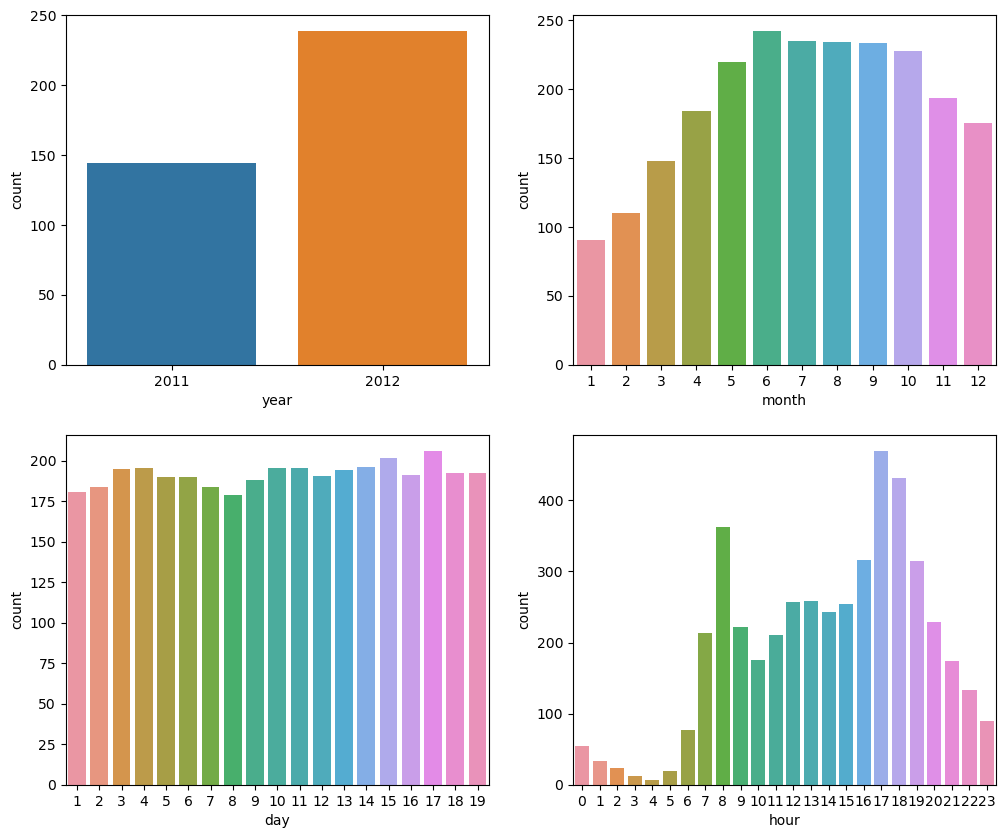

In [295]:
fig=plt.figure(figsize=[12,10])

ax1=fig.add_subplot(2,2,1)
ax1=sns.barplot(x='year', y='count', data=train.groupby('year')['count'].mean().reset_index())
ax1=fig.add_subplot(2,2,2)
ax2=sns.barplot(x='month', y='count', data=train.groupby('month')['count'].mean().reset_index())
ax1=fig.add_subplot(2,2,3)
ax2=sns.barplot(x='day', y='count', data=train.groupby('day')['count'].mean().reset_index())
ax1=fig.add_subplot(2,2,4)
ax2=sns.barplot(x='hour', y='count', data=train.groupby('hour')['count'].mean().reset_index())

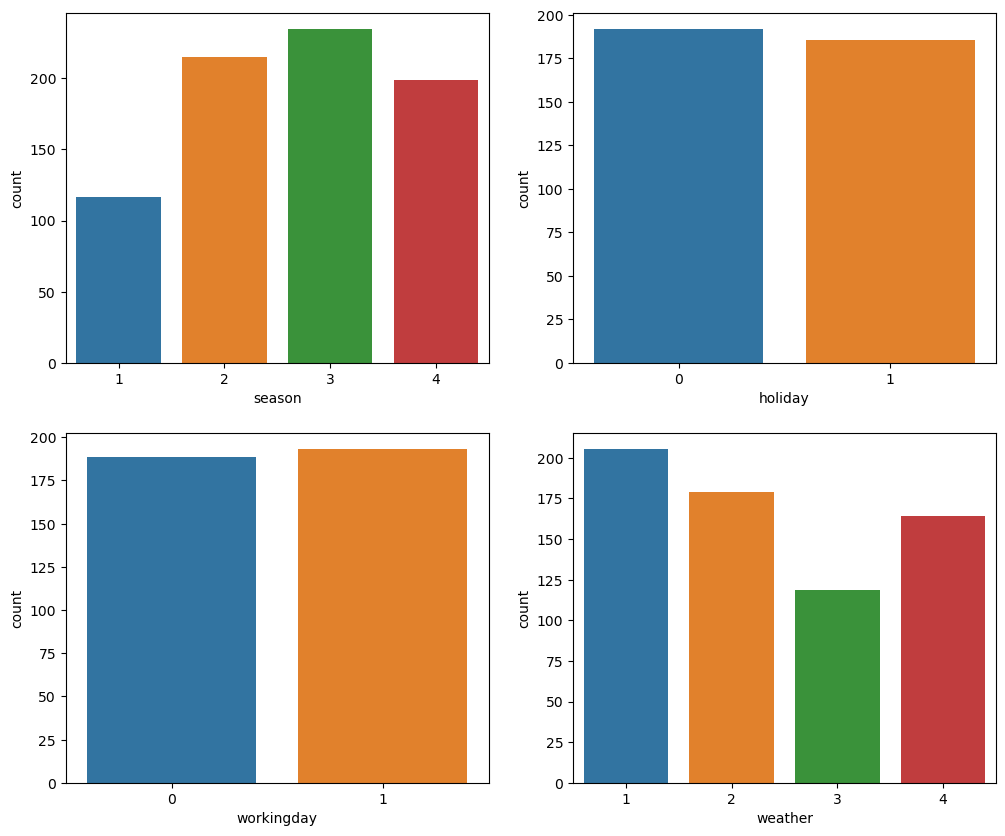

In [296]:
fig=plt.figure(figsize=[12,10])

ax1=fig.add_subplot(2,2,1)
ax1=sns.barplot(x='season', y='count', data=train.groupby('season')['count'].mean().reset_index())
ax1=fig.add_subplot(2,2,2)
ax2=sns.barplot(x='holiday', y='count', data=train.groupby('holiday')['count'].mean().reset_index())
ax1=fig.add_subplot(2,2,3)
ax2=sns.barplot(x='workingday', y='count', data=train.groupby('workingday')['count'].mean().reset_index())
ax1=fig.add_subplot(2,2,4)
ax2=sns.barplot(x='weather', y='count', data=train.groupby('weather')['count'].mean().reset_index())

In [297]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,Saturday
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,Saturday
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,Saturday
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,Saturday
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,Saturday


In [298]:
train.month
train.season
#봄(3,4,5월) : 1... 겨울(12,1,2월): 4

0        1
1        1
2        1
3        1
4        1
        ..
10881    4
10882    4
10883    4
10884    4
10885    4
Name: season, Length: 10886, dtype: int64

In [299]:
def newSeason(month):
    if month in [12,1,2]:
        return 4
    elif month in [3,4,5]:
        return 1
    elif month in [6,7,8]:
        return 2
    elif month in [9,10,11]:
        return 3

In [300]:
train['season']=train.month.apply(newSeason)

In [301]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,weekday
0,2011-01-01 00:00:00,4,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,Saturday
1,2011-01-01 01:00:00,4,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,Saturday
2,2011-01-01 02:00:00,4,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,Saturday
3,2011-01-01 03:00:00,4,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,Saturday
4,2011-01-01 04:00:00,4,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,Wednesday
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,Wednesday
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,Wednesday
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,Wednesday


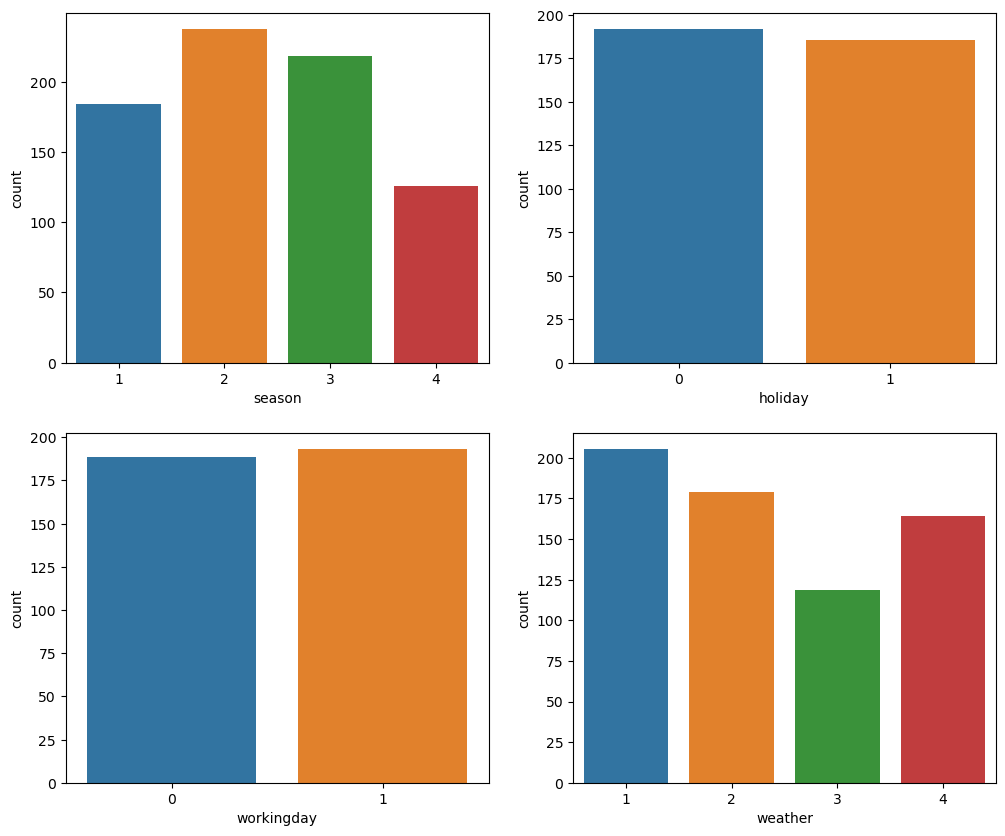

In [302]:
fig=plt.figure(figsize=[12,10])

ax1=fig.add_subplot(2,2,1)
ax1=sns.barplot(x='season', y='count', data=train.groupby('season')['count'].mean().reset_index())
ax1=fig.add_subplot(2,2,2)
ax2=sns.barplot(x='holiday', y='count', data=train.groupby('holiday')['count'].mean().reset_index())
ax1=fig.add_subplot(2,2,3)
ax2=sns.barplot(x='workingday', y='count', data=train.groupby('workingday')['count'].mean().reset_index())
ax1=fig.add_subplot(2,2,4)
ax2=sns.barplot(x='weather', y='count', data=train.groupby('weather')['count'].mean().reset_index())

C:\Users\user\AppData\Local\Temp\ipykernel_2676\1167998953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(train.temp,bins=range(int(train.temp.min()),int(train.temp.max())+1))
C:\Users\user\AppData\Local\Temp\ipykernel_2676\1167998953.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.d

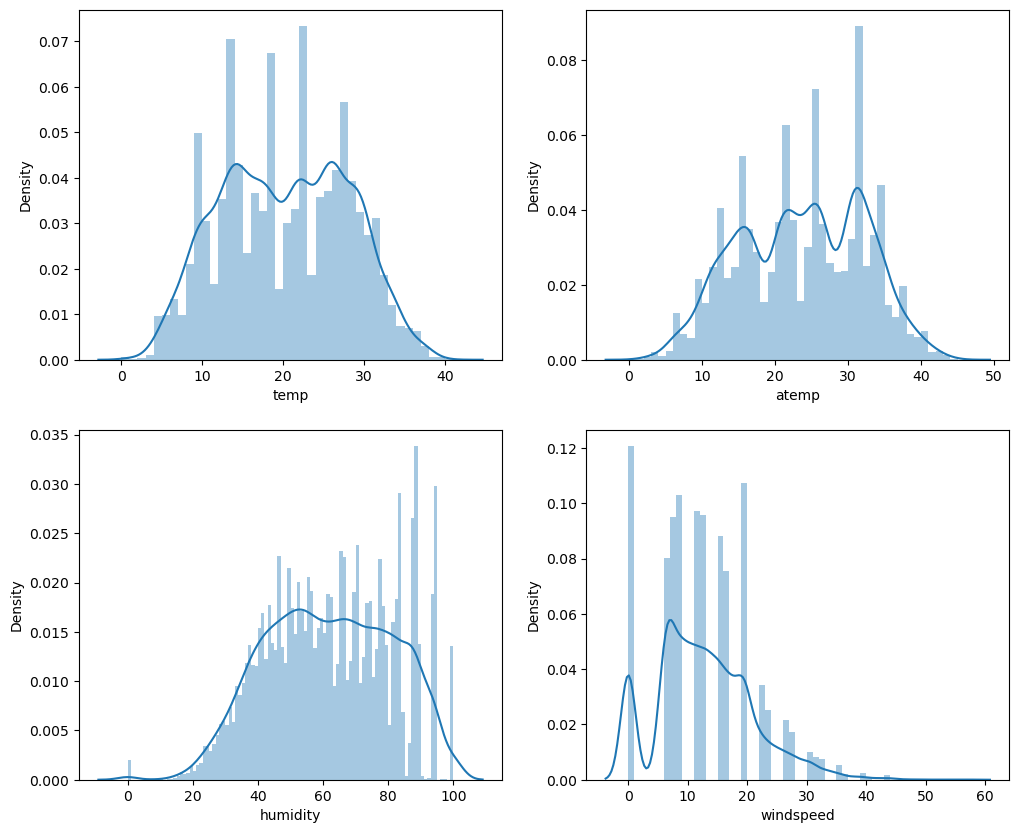

In [303]:
#온도와 count
fig = plt.figure(figsize=[12,10])
ax1 = fig.add_subplot(2,2,1)
ax1 = sns.distplot(train.temp,bins=range(int(train.temp.min()),int(train.temp.max())+1))
# 체감온도와 count
ax2 = fig.add_subplot(2,2,2)
ax2 = sns.distplot(train.atemp,bins=range(int(train.atemp.min()),int(train.atemp.max())+1))

#습도와 count
ax3 = fig.add_subplot(2,2,3)
ax3 = sns.distplot(train.humidity,bins=range(int(train.humidity.min()),int(train.humidity.max())+1))

#바람속도와 count
ax4 = fig.add_subplot(2,2,4)
ax4 = sns.distplot(train.windspeed,bins=range(int(train.windspeed.min()),int(train.windspeed.max())+1))

In [304]:
train[train['windspeed']==0]
#season 과 humidity KNN 알고리즘 사용하여 windspeed 값 예측해서 채우기

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,weekday
0,2011-01-01 00:00:00,4,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,Saturday
1,2011-01-01 01:00:00,4,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,Saturday
2,2011-01-01 02:00:00,4,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,Saturday
3,2011-01-01 03:00:00,4,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,Saturday
4,2011-01-01 04:00:00,4,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10826,2012-12-17 12:00:00,4,0,1,2,16.40,20.455,87,0.0,21,211,232,2012,12,17,12,Monday
10829,2012-12-17 15:00:00,4,0,1,2,17.22,21.210,88,0.0,15,196,211,2012,12,17,15,Monday
10846,2012-12-18 08:00:00,4,0,1,1,15.58,19.695,94,0.0,10,652,662,2012,12,18,8,Tuesday
10860,2012-12-18 22:00:00,4,0,1,1,13.94,16.665,49,0.0,5,127,132,2012,12,18,22,Tuesday


C:\Users\user\AppData\Local\Temp\ipykernel_2676\2152326737.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(), annot=True, square=True)


<Axes: >

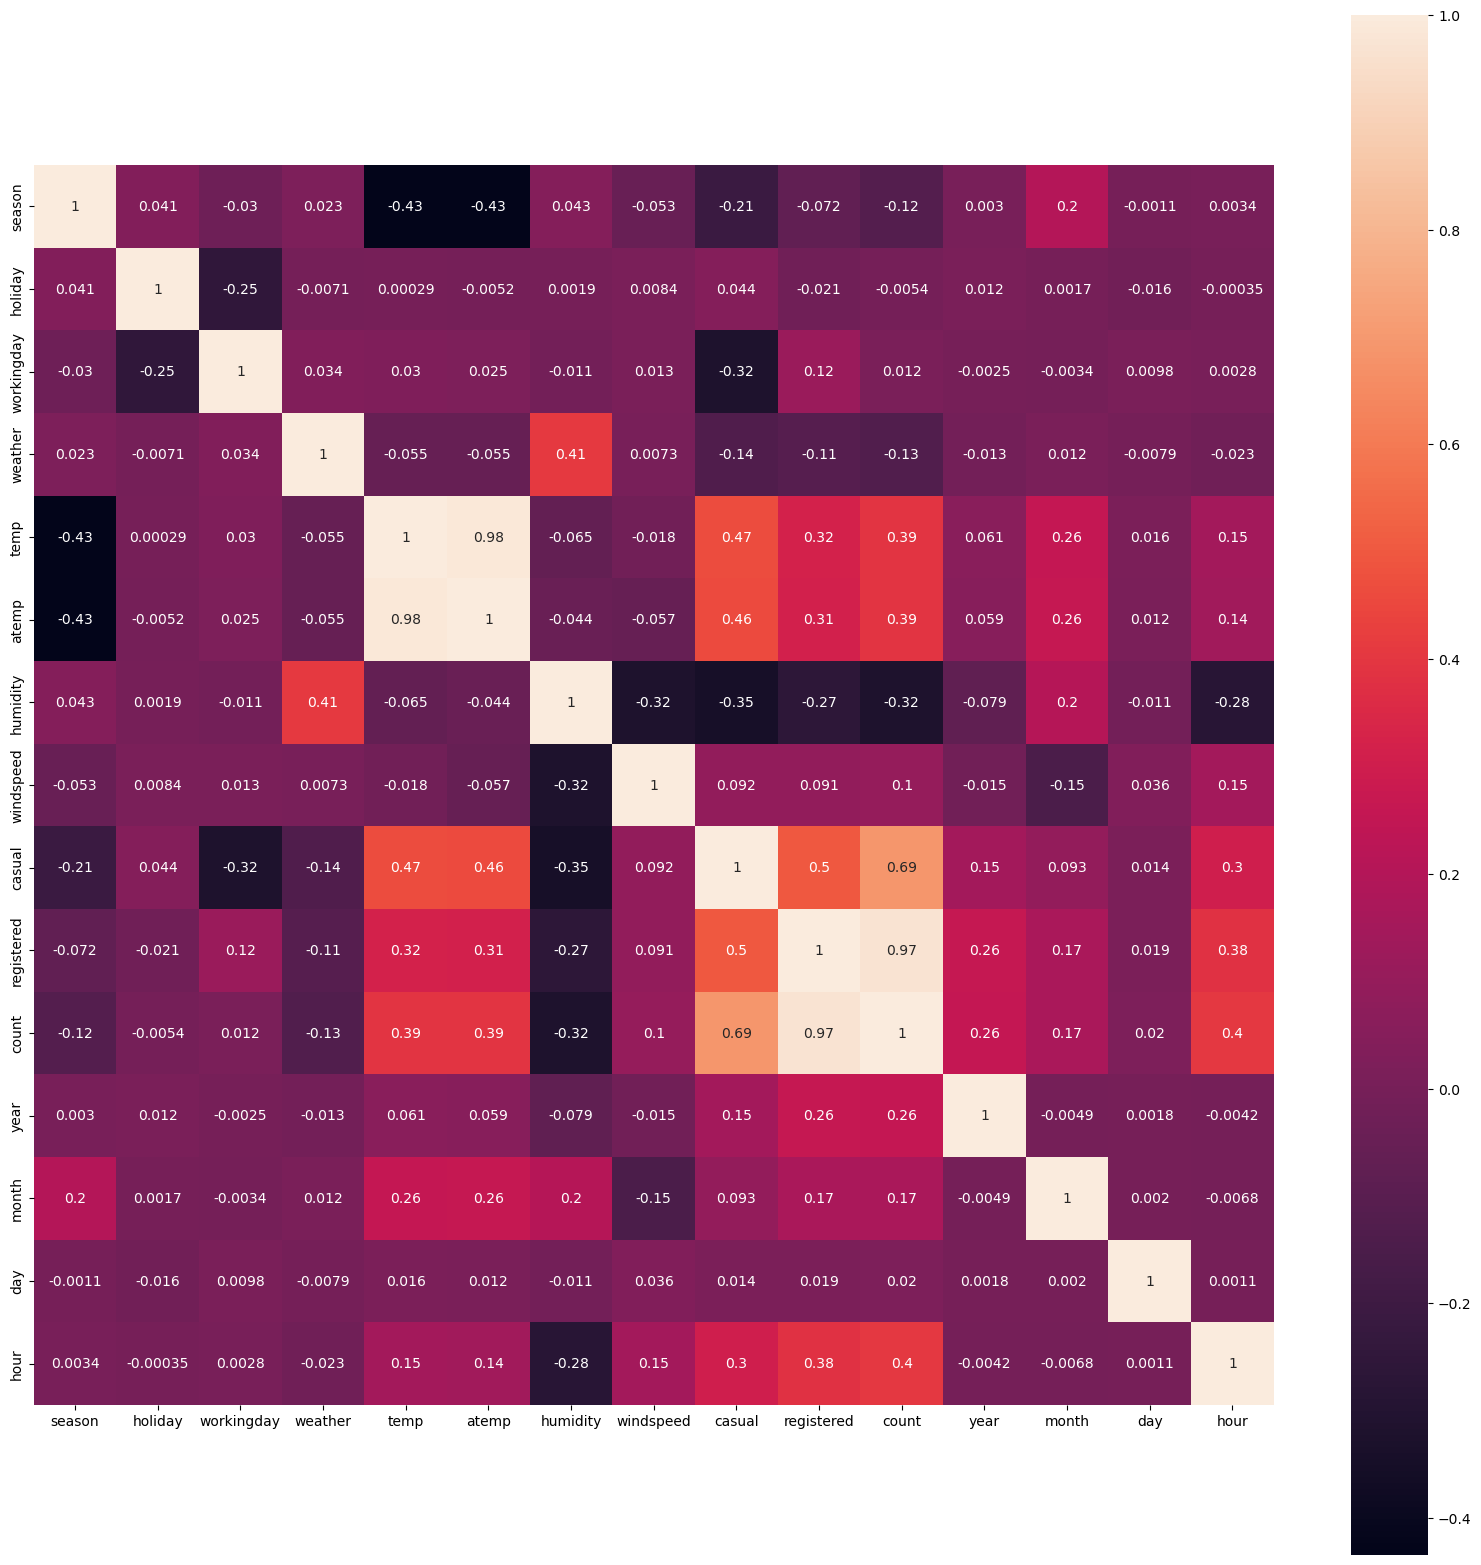

In [305]:
fig=plt.figure(figsize=[20,20])
sns.heatmap(train.corr(), annot=True, square=True)

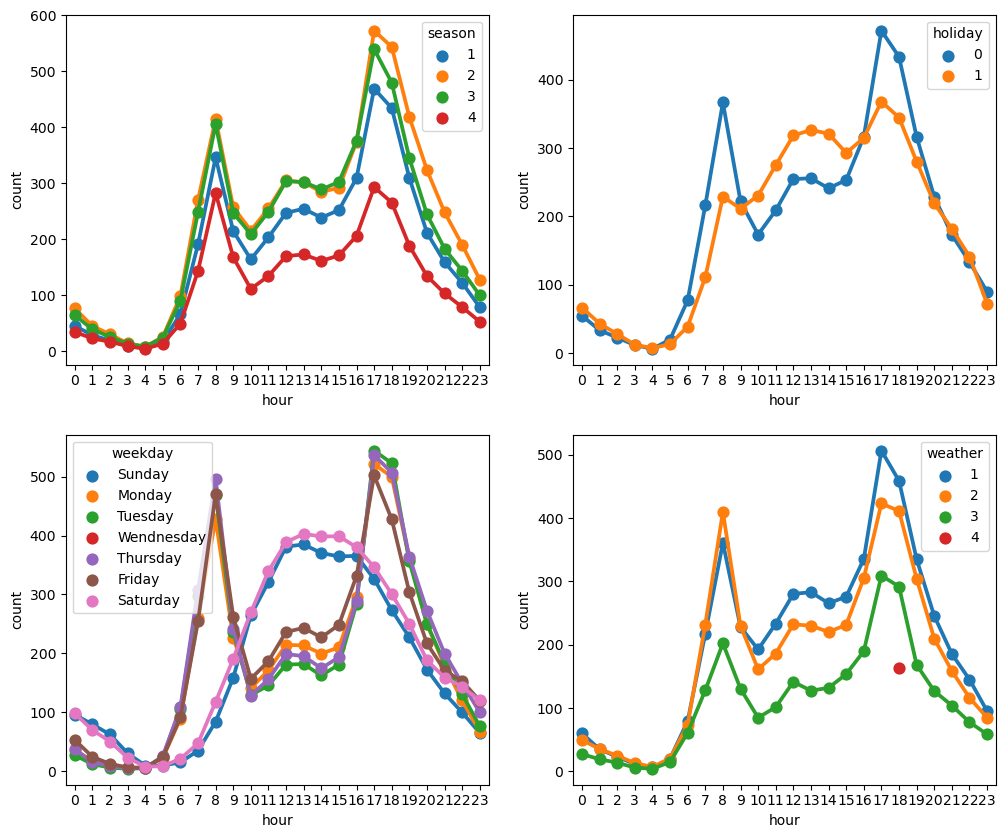

In [306]:
#시간과 계절에 따른 count
fig = plt.figure(figsize=[12,10])
ax1 = fig.add_subplot(2,2,1)
ax1 = sns.pointplot(x='hour',y='count',hue='season',data=train.groupby(['season','hour'])['count'].mean().reset_index())

#시간과 휴일 여부에 따른 count
ax2 = fig.add_subplot(2,2,2)
ax2 = sns.pointplot(x='hour',y='count',hue='holiday',data=train.groupby(['holiday','hour'])['count'].mean().reset_index())

#시간과 휴일 여부에 따른 count
ax3 = fig.add_subplot(2,2,3)
ax3 = sns.pointplot(x='hour',y='count',hue='weekday',hue_order=['Sunday','Monday','Tuesday','Wendnesday','Thursday','Friday','Saturday'],data=train.groupby(['weekday','hour'])['count'].mean().reset_index())

#시간과 날씨에 따른 count
ax4 = fig.add_subplot(2,2,4)
ax4 = sns.pointplot(x='hour',y='count',hue='weather',data=train.groupby(['weather','hour'])['count'].mean().reset_index())

In [307]:
train[train.weather==4]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,weekday
5631,2012-01-09 18:00:00,4,0,1,4,8.2,11.365,86,6.0032,6,158,164,2012,1,9,18,Monday


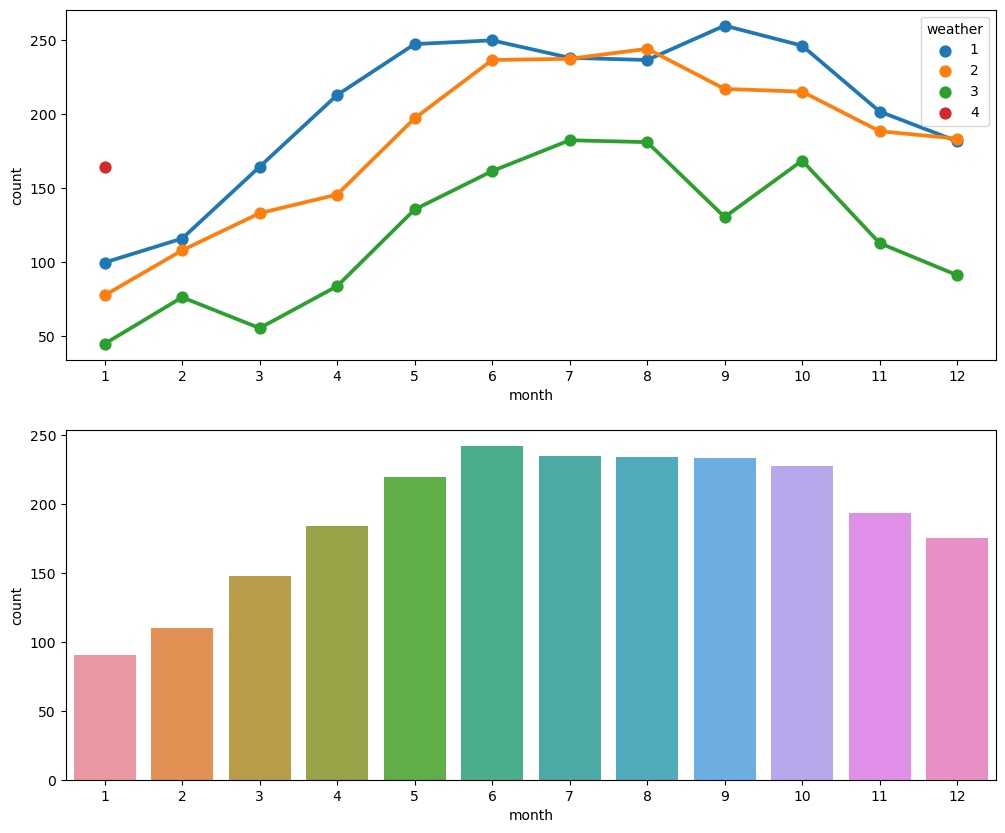

In [308]:
fig = plt.figure(figsize=[12,10])
ax1 = fig.add_subplot(2,1,1)
ax1 = sns.pointplot(x='month',y='count',hue='weather',data=train.groupby(['weather','month'])['count'].mean().reset_index())


ax2 = fig.add_subplot(2,1,2)
ax2 = sns.barplot(x='month',y='count',data=train.groupby('month')['count'].mean().reset_index())

In [309]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
 12  year        10886 non-null  int64  
 13  month       10886 non-null  int64  
 14  day         10886 non-null  int64  
 15  hour        10886 non-null  int64  
 16  weekday     10886 non-null  object 
dtypes: float64(3), int64(12), object(2)
memory usage: 1.4+ MB


In [310]:
train['weekday']=train.weekday.astype('category')

In [311]:
train['weekday'].cat.categories

Index(['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday'],
      dtype='object')

In [312]:
#0 : sunday ~ 6 : saturday

In [313]:
train['weekday'].cat.categories=['5', '1', '6', '0', '4', '2', '3']

C:\Users\user\AppData\Local\Temp\ipykernel_2676\441601966.py:1: FutureWarning: Setting categories in-place is deprecated and will raise in a future version. Use rename_categories instead.
  train['weekday'].cat.categories=['5', '1', '6', '0', '4', '2', '3']


In [314]:
train['weekday']

0        6
1        6
2        6
3        6
4        6
        ..
10881    3
10882    3
10883    3
10884    3
10885    3
Name: weekday, Length: 10886, dtype: category
Categories (7, object): ['5', '1', '6', '0', '4', '2', '3']

In [315]:
'''
풍속이 0이 아닌 값들로 구성된 데이터프레임에서 풍속 예측 모델 생성
풍속이 0인 값들로 구성된 데이트프레임에 대한 풍속을 예측하여 값을 저장
'''

'\n풍속이 0이 아닌 값들로 구성된 데이터프레임에서 풍속 예측 모델 생성\n풍속이 0인 값들로 구성된 데이트프레임에 대한 풍속을 예측하여 값을 저장\n'

In [316]:
from sklearn.ensemble import RandomForestRegressor

In [317]:
windspeed_0=train[train.windspeed==0]
windspeed_0

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,weekday
0,2011-01-01 00:00:00,4,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,6
1,2011-01-01 01:00:00,4,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,6
2,2011-01-01 02:00:00,4,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,6
3,2011-01-01 03:00:00,4,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,6
4,2011-01-01 04:00:00,4,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10826,2012-12-17 12:00:00,4,0,1,2,16.40,20.455,87,0.0,21,211,232,2012,12,17,12,1
10829,2012-12-17 15:00:00,4,0,1,2,17.22,21.210,88,0.0,15,196,211,2012,12,17,15,1
10846,2012-12-18 08:00:00,4,0,1,1,15.58,19.695,94,0.0,10,652,662,2012,12,18,8,2
10860,2012-12-18 22:00:00,4,0,1,1,13.94,16.665,49,0.0,5,127,132,2012,12,18,22,2


In [318]:
windspeed_0.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'weekday'],
      dtype='object')

In [319]:
windspeed_0_df=windspeed_0.drop(['datetime', 'holiday', 'workingday', 'windspeed', 'casual', 'registered', 'count', 'day', 'weekday'], axis=1)
windspeed_0_df

,season,weather,temp,atemp,humidity,year,month,hour
0,4,1,9.84,14.395,81,2011,1,0
1,4,1,9.02,13.635,80,2011,1,1
2,4,1,9.02,13.635,80,2011,1,2
3,4,1,9.84,14.395,75,2011,1,3
4,4,1,9.84,14.395,75,2011,1,4
...,...,...,...,...,...,...,...,...
10826,4,2,16.40,20.455,87,2012,12,12
10829,4,2,17.22,21.210,88,2012,12,15
10846,4,1,15.58,19.695,94,2012,12,8
10860,4,1,13.94,16.665,49,2012,12,22


In [320]:
windspeed_not0=train[train.windspeed!=0]
windspeed_not0

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,weekday
5,2011-01-01 05:00:00,4,0,0,2,9.84,12.880,75,6.0032,0,1,1,2011,1,1,5,6
10,2011-01-01 10:00:00,4,0,0,1,15.58,19.695,76,16.9979,12,24,36,2011,1,1,10,6
11,2011-01-01 11:00:00,4,0,0,1,14.76,16.665,81,19.0012,26,30,56,2011,1,1,11,6
12,2011-01-01 12:00:00,4,0,0,1,17.22,21.210,77,19.0012,29,55,84,2011,1,1,12,6
13,2011-01-01 13:00:00,4,0,0,2,18.86,22.725,72,19.9995,47,47,94,2011,1,1,13,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,3
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,3
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,3
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,3


In [321]:
#8차원 데이터의 독립변수
windspeed_not0_df=windspeed_not0.drop(['datetime', 'holiday', 'workingday', 'windspeed', 'casual', 'registered', 'count', 'day', 'weekday'], axis=1)
windspeed_not0_df

,season,weather,temp,atemp,humidity,year,month,hour
5,4,2,9.84,12.880,75,2011,1,5
10,4,1,15.58,19.695,76,2011,1,10
11,4,1,14.76,16.665,81,2011,1,11
12,4,1,17.22,21.210,77,2011,1,12
13,4,2,18.86,22.725,72,2011,1,13
...,...,...,...,...,...,...,...,...
10881,4,1,15.58,19.695,50,2012,12,19
10882,4,1,14.76,17.425,57,2012,12,20
10883,4,1,13.94,15.910,61,2012,12,21
10884,4,1,13.94,17.425,61,2012,12,22


In [322]:
#windspeed_not0['windspeed']가 종속변수(타겟)

In [323]:
windspeed_not0_series=windspeed_not0['windspeed']
windspeed_not0_series

5         6.0032
10       16.9979
11       19.0012
12       19.0012
13       19.9995
          ...   
10881    26.0027
10882    15.0013
10883    15.0013
10884     6.0032
10885     8.9981
Name: windspeed, Length: 9573, dtype: float64

In [324]:
windspeed_not0_df
windspeed_not0_series

5         6.0032
10       16.9979
11       19.0012
12       19.0012
13       19.9995
          ...   
10881    26.0027
10882    15.0013
10883    15.0013
10884     6.0032
10885     8.9981
Name: windspeed, Length: 9573, dtype: float64

In [325]:
rf=RandomForestRegressor()

In [326]:
rf.fit(windspeed_not0_df, windspeed_not0_series) #regressor 모델 만들기

RandomForestRegressor()

In [327]:
windspeed_0['windspeed']=rf.predict(windspeed_0_df) #

C:\Users\user\AppData\Local\Temp\ipykernel_2676\897438293.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  windspeed_0['windspeed']=rf.predict(windspeed_0_df) #


In [328]:
windspeed_0

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,weekday
0,2011-01-01 00:00:00,4,0,0,1,9.84,14.395,81,8.642196,3,13,16,2011,1,1,0,6
1,2011-01-01 01:00:00,4,0,0,1,9.02,13.635,80,8.152560,8,32,40,2011,1,1,1,6
2,2011-01-01 02:00:00,4,0,0,1,9.02,13.635,80,8.342438,5,27,32,2011,1,1,2,6
3,2011-01-01 03:00:00,4,0,0,1,9.84,14.395,75,6.231212,3,10,13,2011,1,1,3,6
4,2011-01-01 04:00:00,4,0,0,1,9.84,14.395,75,6.218800,0,1,1,2011,1,1,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10826,2012-12-17 12:00:00,4,0,1,2,16.40,20.455,87,14.327053,21,211,232,2012,12,17,12,1
10829,2012-12-17 15:00:00,4,0,1,2,17.22,21.210,88,11.868905,15,196,211,2012,12,17,15,1
10846,2012-12-18 08:00:00,4,0,1,1,15.58,19.695,94,7.811597,10,652,662,2012,12,18,8,2
10860,2012-12-18 22:00:00,4,0,1,1,13.94,16.665,49,12.028443,5,127,132,2012,12,18,22,2


In [329]:
train=pd.concat([windspeed_0, windspeed_not0], axis=0)

In [330]:
train[train.windspeed==0]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,weekday


In [331]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10886 entries, 0 to 10885
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   datetime    10886 non-null  object  
 1   season      10886 non-null  int64   
 2   holiday     10886 non-null  int64   
 3   workingday  10886 non-null  int64   
 4   weather     10886 non-null  int64   
 5   temp        10886 non-null  float64 
 6   atemp       10886 non-null  float64 
 7   humidity    10886 non-null  int64   
 8   windspeed   10886 non-null  float64 
 9   casual      10886 non-null  int64   
 10  registered  10886 non-null  int64   
 11  count       10886 non-null  int64   
 12  year        10886 non-null  int64   
 13  month       10886 non-null  int64   
 14  day         10886 non-null  int64   
 15  hour        10886 non-null  int64   
 16  weekday     10886 non-null  category
dtypes: category(1), float64(3), int64(12), object(1)
memory usage: 1.4+ MB


In [332]:
train.datetime=pd.to_datetime(train.datetime)

In [333]:
train=train.sort_values(['datetime'], ascending=False)
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,weekday
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.998100,4,84,88,2012,12,19,23,3
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.003200,12,117,129,2012,12,19,22,3
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.001300,4,164,168,2012,12,19,21,3
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.001300,10,231,241,2012,12,19,20,3
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.002700,7,329,336,2012,12,19,19,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2011-01-01 04:00:00,4,0,0,1,9.84,14.395,75,6.218800,0,1,1,2011,1,1,4,6
3,2011-01-01 03:00:00,4,0,0,1,9.84,14.395,75,6.231212,3,10,13,2011,1,1,3,6
2,2011-01-01 02:00:00,4,0,0,1,9.02,13.635,80,8.342438,5,27,32,2011,1,1,2,6
1,2011-01-01 01:00:00,4,0,0,1,9.02,13.635,80,8.152560,8,32,40,2011,1,1,1,6


C:\Users\user\AppData\Local\Temp\ipykernel_2676\1592813421.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(), annot=True, square=True)


<Axes: >

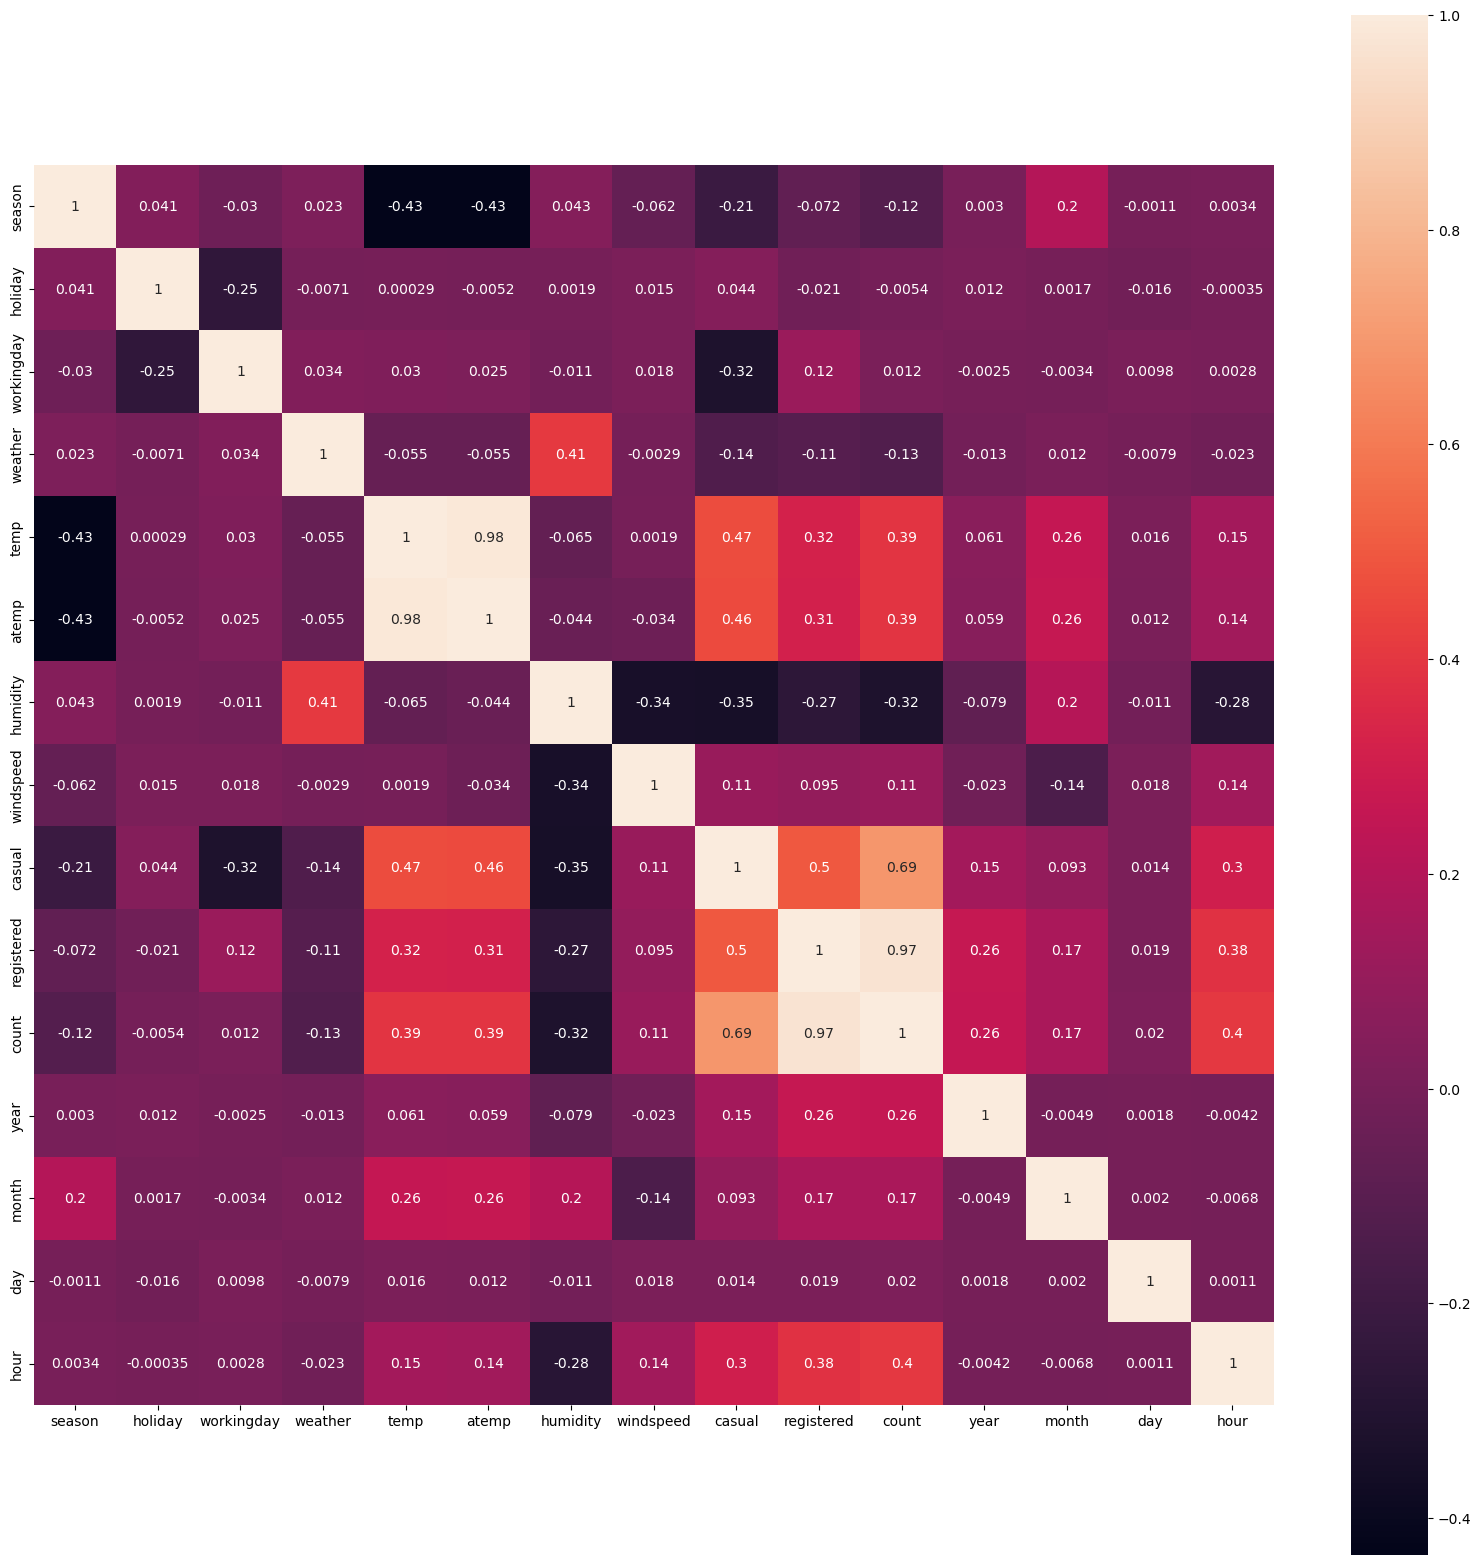

In [334]:
plt.figure(figsize=[20,20])
sns.heatmap(train.corr(), annot=True, square=True)

C:\Users\user\AppData\Local\Temp\ipykernel_2676\2520913288.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train.windspeed,bins=range(int(train.windspeed.min()),int(train.windspeed.max())+1))


<Axes: xlabel='windspeed', ylabel='Density'>

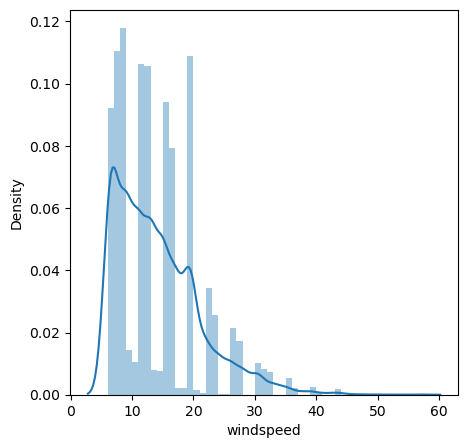

In [335]:
plt.figure(figsize=[5,5])
sns.distplot(train.windspeed,bins=range(int(train.windspeed.min()),int(train.windspeed.max())+1))

In [336]:
train=pd.read_csv("bike-sharing-demand/train.csv")
test=pd.read_csv("bike-sharing-demand/test.csv")

In [337]:
combine = pd.concat([train,test],axis=0)

In [338]:
combine

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,NaN
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,NaN


In [339]:
combine['tempDate'] = combine.datetime.apply(lambda x:x.split())
combine['weekday'] = combine.tempDate.apply(lambda x: calendar.day_name[datetime.strptime(x[0],"%Y-%m-%d").weekday()])
combine['year'] = combine.tempDate.apply(lambda x: x[0].split('-')[0])
combine['month'] = combine.tempDate.apply(lambda x: x[0].split('-')[1])
combine['day'] = combine.tempDate.apply(lambda x: x[0].split('-')[2])
combine['hour'] = combine.tempDate.apply(lambda x: x[1].split(':')[0])

In [340]:
combine['year'] = pd.to_numeric(combine.year)
combine['month'] = pd.to_numeric(combine.month)
combine['day'] = pd.to_numeric(combine.day)
combine['hour'] = pd.to_numeric(combine.hour)

In [341]:
combine['season']=combine.month.apply(newSeason)

In [342]:
combine.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,tempDate,weekday,year,month,day,hour
0,2011-01-01 00:00:00,4,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16.0,"[2011-01-01, 00:00:00]",Saturday,2011,1,1,0
1,2011-01-01 01:00:00,4,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40.0,"[2011-01-01, 01:00:00]",Saturday,2011,1,1,1
2,2011-01-01 02:00:00,4,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32.0,"[2011-01-01, 02:00:00]",Saturday,2011,1,1,2
3,2011-01-01 03:00:00,4,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13.0,"[2011-01-01, 03:00:00]",Saturday,2011,1,1,3
4,2011-01-01 04:00:00,4,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1.0,"[2011-01-01, 04:00:00]",Saturday,2011,1,1,4


In [343]:
combine.weekday = combine.weekday.astype('category')

In [344]:
combine.weekday.cat.categories = ['5','1','6','0','4','2','3']

C:\Users\user\AppData\Local\Temp\ipykernel_2676\3864947247.py:1: FutureWarning: Setting categories in-place is deprecated and will raise in a future version. Use rename_categories instead.
  combine.weekday.cat.categories = ['5','1','6','0','4','2','3']


In [345]:
dataWind0 = combine[combine['windspeed']==0]
dataWindNot0 = combine[combine['windspeed']!=0]

In [346]:
dataWind0.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'tempDate', 'weekday', 'year', 'month', 'day', 'hour'],
      dtype='object')

In [347]:
dataWind0_df=dataWind0.drop(['datetime','windspeed','casual', 'registered','count', 'holiday', 'workingday', 'day', 'weekday', 'tempDate'], axis=1)
dataWindNot0_df=dataWindNot0.drop(['datetime','windspeed','casual', 'registered','count', 'holiday', 'workingday', 'day', 'weekday', 'tempDate'], axis=1)

In [348]:
dataWindNot0_series=dataWindNot0['windspeed']

In [349]:
dataWindNot0_series

5        6.0032
10      16.9979
11      19.0012
12      19.0012
13      19.9995
         ...   
6488    11.0014
6489    11.0014
6490    11.0014
6491     8.9981
6492     8.9981
Name: windspeed, Length: 15199, dtype: float64

In [350]:
dataWindNot0_df

,season,weather,temp,atemp,humidity,year,month,hour
5,4,2,9.84,12.880,75,2011,1,5
10,4,1,15.58,19.695,76,2011,1,10
11,4,1,14.76,16.665,81,2011,1,11
12,4,1,17.22,21.210,77,2011,1,12
13,4,2,18.86,22.725,72,2011,1,13
...,...,...,...,...,...,...,...,...
6488,4,2,10.66,12.880,60,2012,12,19
6489,4,2,10.66,12.880,60,2012,12,20
6490,4,1,10.66,12.880,60,2012,12,21
6491,4,1,10.66,13.635,56,2012,12,22


In [351]:
rf2=RandomForestRegressor()
rf2.fit(dataWindNot0_df, dataWindNot0_series)

RandomForestRegressor()

In [352]:
pred=rf2.predict(dataWind0_df)
pred

array([ 6.552801,  6.412838,  6.212977, ...,  8.74149 , 23.020128,
        8.480659])

In [353]:
dataWind0['windspeed']=pred

C:\Users\user\AppData\Local\Temp\ipykernel_2676\2633739318.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataWind0['windspeed']=pred


In [354]:
combine=pd.concat([dataWindNot0, dataWind0])

In [355]:
combine

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,tempDate,weekday,year,month,day,hour
5,2011-01-01 05:00:00,4,0,0,2,9.84,12.880,75,6.003200,0.0,1.0,1.0,"[2011-01-01, 05:00:00]",6,2011,1,1,5
10,2011-01-01 10:00:00,4,0,0,1,15.58,19.695,76,16.997900,12.0,24.0,36.0,"[2011-01-01, 10:00:00]",6,2011,1,1,10
11,2011-01-01 11:00:00,4,0,0,1,14.76,16.665,81,19.001200,26.0,30.0,56.0,"[2011-01-01, 11:00:00]",6,2011,1,1,11
12,2011-01-01 12:00:00,4,0,0,1,17.22,21.210,77,19.001200,29.0,55.0,84.0,"[2011-01-01, 12:00:00]",6,2011,1,1,12
13,2011-01-01 13:00:00,4,0,0,2,18.86,22.725,72,19.999500,47.0,47.0,94.0,"[2011-01-01, 13:00:00]",6,2011,1,1,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6433,2012-12-29 12:00:00,4,0,0,3,8.20,12.120,100,8.192090,NaN,NaN,NaN,"[2012-12-29, 12:00:00]",6,2012,12,29,12
6434,2012-12-29 13:00:00,4,0,0,3,8.20,12.120,100,8.172057,NaN,NaN,NaN,"[2012-12-29, 13:00:00]",6,2012,12,29,13
6436,2012-12-29 15:00:00,4,0,0,2,9.84,12.120,87,8.741490,NaN,NaN,NaN,"[2012-12-29, 15:00:00]",6,2012,12,29,15
6444,2012-12-29 23:00:00,4,0,0,2,10.66,12.120,60,23.020128,NaN,NaN,NaN,"[2012-12-29, 23:00:00]",6,2012,12,29,23


In [356]:
combine['season'].astype('category')

5       4
10      4
11      4
12      4
13      4
       ..
6433    4
6434    4
6436    4
6444    4
6464    4
Name: season, Length: 17379, dtype: category
Categories (4, int64): [1, 2, 3, 4]

In [357]:
pd.get_dummies(combine['season']) #원핫인코딩

,1,2,3,4
5,0,0,0,1
10,0,0,0,1
11,0,0,0,1
12,0,0,0,1
13,0,0,0,1
...,...,...,...,...
6433,0,0,0,1
6434,0,0,0,1
6436,0,0,0,1
6444,0,0,0,1


In [358]:
'''
데이터 타입 : 수치형, 범주형
수치형 : 연속형(실수), 이산형(정수)
범주형(종류) : 명목형(순서가 없음, 혈액형, 색), 순서형(1~12월,계절,학점)

원핫인코딩 : 수치형을 범주형으로

양서류 1, 포유류 2, 파충류 3, 조류 4

종    1     2     3     4
3 =>  0     0     1     0
1 =>  1     0     0     0
2 =>  0     0     1     0
4 =>  0     0     1     0
3 =>  0     0     1     0
'''

'\n데이터 타입 : 수치형, 범주형\n수치형 : 연속형(실수), 이산형(정수)\n범주형(종류) : 명목형(순서가 없음, 혈액형, 색), 순서형(1~12월,계절,학점)\n\n원핫인코딩 : 수치형을 범주형으로\n\n양서류 1, 포유류 2, 파충류 3, 조류 4\n\n종    1     2     3     4\n3 =>  0     0     1     0\n1 =>  1     0     0     0\n2 =>  0     0     1     0\n4 =>  0     0     1     0\n3 =>  0     0     1     0\n'

In [359]:
combine.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'tempDate', 'weekday', 'year', 'month', 'day', 'hour'],
      dtype='object')

In [360]:
cate_cols=['season', 'weather', 'weekday', 'year', 'month', 'hour']
drop_cols=['datetime', 'casual', 'registered', 'count', 'tempDate', 'day']

In [361]:
for col in cate_cols:
    combine[col]=combine[col].astype('category')

In [362]:
combine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 5 to 6464
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   datetime    17379 non-null  object  
 1   season      17379 non-null  category
 2   holiday     17379 non-null  int64   
 3   workingday  17379 non-null  int64   
 4   weather     17379 non-null  category
 5   temp        17379 non-null  float64 
 6   atemp       17379 non-null  float64 
 7   humidity    17379 non-null  int64   
 8   windspeed   17379 non-null  float64 
 9   casual      10886 non-null  float64 
 10  registered  10886 non-null  float64 
 11  count       10886 non-null  float64 
 12  tempDate    17379 non-null  object  
 13  weekday     17379 non-null  category
 14  year        17379 non-null  category
 15  month       17379 non-null  category
 16  day         17379 non-null  int64   
 17  hour        17379 non-null  category
dtypes: category(6), float64(6), int64(4), object(2)

In [390]:
train=combine[pd.notnull(combine['count'])].sort_values('datetime')
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,tempDate,weekday,year,month,day,hour
0,2011-01-01 00:00:00,4,0,0,1,9.84,14.395,81,6.552801,3.0,13.0,16.0,"[2011-01-01, 00:00:00]",6,2011,1,1,0
1,2011-01-01 01:00:00,4,0,0,1,9.02,13.635,80,6.412838,8.0,32.0,40.0,"[2011-01-01, 01:00:00]",6,2011,1,1,1
2,2011-01-01 02:00:00,4,0,0,1,9.02,13.635,80,6.212977,5.0,27.0,32.0,"[2011-01-01, 02:00:00]",6,2011,1,1,2
3,2011-01-01 03:00:00,4,0,0,1,9.84,14.395,75,6.153012,3.0,10.0,13.0,"[2011-01-01, 03:00:00]",6,2011,1,1,3
4,2011-01-01 04:00:00,4,0,0,1,9.84,14.395,75,6.093047,0.0,1.0,1.0,"[2011-01-01, 04:00:00]",6,2011,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.002700,7.0,329.0,336.0,"[2012-12-19, 19:00:00]",3,2012,12,19,19
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.001300,10.0,231.0,241.0,"[2012-12-19, 20:00:00]",3,2012,12,19,20
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.001300,4.0,164.0,168.0,"[2012-12-19, 21:00:00]",3,2012,12,19,21
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.003200,12.0,117.0,129.0,"[2012-12-19, 22:00:00]",3,2012,12,19,22


In [391]:
ylabel=train['count'] #train에 대한 정답
ylabel

0         16.0
1         40.0
2         32.0
3         13.0
4          1.0
         ...  
10881    336.0
10882    241.0
10883    168.0
10884    129.0
10885     88.0
Name: count, Length: 10886, dtype: float64

In [392]:
test=combine[~pd.notnull(combine['count'])].sort_values('datetime')
test

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,tempDate,weekday,year,month,day,hour
0,2011-01-20 00:00:00,4,0,1,1,10.66,11.365,56,26.002700,NaN,NaN,NaN,"[2011-01-20, 00:00:00]",4,2011,1,20,0
1,2011-01-20 01:00:00,4,0,1,1,10.66,13.635,56,9.208882,NaN,NaN,NaN,"[2011-01-20, 01:00:00]",4,2011,1,20,1
2,2011-01-20 02:00:00,4,0,1,1,10.66,13.635,56,9.179134,NaN,NaN,NaN,"[2011-01-20, 02:00:00]",4,2011,1,20,2
3,2011-01-20 03:00:00,4,0,1,1,10.66,12.880,56,11.001400,NaN,NaN,NaN,"[2011-01-20, 03:00:00]",4,2011,1,20,3
4,2011-01-20 04:00:00,4,0,1,1,10.66,12.880,56,11.001400,NaN,NaN,NaN,"[2011-01-20, 04:00:00]",4,2011,1,20,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,4,0,1,2,10.66,12.880,60,11.001400,NaN,NaN,NaN,"[2012-12-31, 19:00:00]",1,2012,12,31,19
6489,2012-12-31 20:00:00,4,0,1,2,10.66,12.880,60,11.001400,NaN,NaN,NaN,"[2012-12-31, 20:00:00]",1,2012,12,31,20
6490,2012-12-31 21:00:00,4,0,1,1,10.66,12.880,60,11.001400,NaN,NaN,NaN,"[2012-12-31, 21:00:00]",1,2012,12,31,21
6491,2012-12-31 22:00:00,4,0,1,1,10.66,13.635,56,8.998100,NaN,NaN,NaN,"[2012-12-31, 22:00:00]",1,2012,12,31,22


In [393]:
datetimecol=test['datetime']
datetimecol

0       2011-01-20 00:00:00
1       2011-01-20 01:00:00
2       2011-01-20 02:00:00
3       2011-01-20 03:00:00
4       2011-01-20 04:00:00
               ...         
6488    2012-12-31 19:00:00
6489    2012-12-31 20:00:00
6490    2012-12-31 21:00:00
6491    2012-12-31 22:00:00
6492    2012-12-31 23:00:00
Name: datetime, Length: 6493, dtype: object

In [394]:
train=train.drop(drop_cols, axis=1)
test=test.drop(drop_cols, axis=1)

In [395]:
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,weekday,year,month,hour
0,4,0,0,1,9.84,14.395,81,6.552801,6,2011,1,0
1,4,0,0,1,9.02,13.635,80,6.412838,6,2011,1,1
2,4,0,0,1,9.02,13.635,80,6.212977,6,2011,1,2
3,4,0,0,1,9.84,14.395,75,6.153012,6,2011,1,3
4,4,0,0,1,9.84,14.395,75,6.093047,6,2011,1,4


In [396]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [370]:
rf=RandomForestRegressor()

In [371]:
rf_params={'n_estimators':[10, 30, 50, 70, 100, 200]} #n_estimators에 주어진 갯수의 평균

In [372]:
grid_cf=GridSearchCV(rf, rf_params, scoring='neg_mean_squared_log_error', cv=5)

In [382]:
grid_cf.fit(train, ylabel)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'n_estimators': [10, 30, 50, 70, 100, 200]},
             scoring='neg_mean_squared_log_error')

In [397]:
pred=grid_cf.predict(test)
pred

array([  9.9       ,   5.01428571,   4.11428571, ..., 168.41428571,
       112.25714286,  64.65714286])

In [398]:
grid_cf.predict(train)

array([ 22.1       ,  35.78571429,  27.71428571, ..., 175.41428571,
       140.78571429,  93.04285714])

In [401]:
test['datetime']

0       2011-01-20 00:00:00
1       2011-01-20 01:00:00
2       2011-01-20 02:00:00
3       2011-01-20 03:00:00
4       2011-01-20 04:00:00
               ...         
6488    2012-12-31 19:00:00
6489    2012-12-31 20:00:00
6490    2012-12-31 21:00:00
6491    2012-12-31 22:00:00
6492    2012-12-31 23:00:00
Name: datetime, Length: 6493, dtype: object

In [403]:
submission=pd.concat([test['datetime'], pd.Series(pred)], axis=1)
submission

,datetime,0
0,2011-01-20 00:00:00,9.900000
1,2011-01-20 01:00:00,5.014286
2,2011-01-20 02:00:00,4.114286
3,2011-01-20 03:00:00,3.171429
4,2011-01-20 04:00:00,2.914286
...,...,...
6488,2012-12-31 19:00:00,374.557143
6489,2012-12-31 20:00:00,241.900000
6490,2012-12-31 21:00:00,168.414286
6491,2012-12-31 22:00:00,112.257143


In [404]:
submission['count']=pred

In [405]:
submission=submission.drop(0, axis=1)
submission

,datetime,count
0,2011-01-20 00:00:00,9.900000
1,2011-01-20 01:00:00,5.014286
2,2011-01-20 02:00:00,4.114286
3,2011-01-20 03:00:00,3.171429
4,2011-01-20 04:00:00,2.914286
...,...,...
6488,2012-12-31 19:00:00,374.557143
6489,2012-12-31 20:00:00,241.900000
6490,2012-12-31 21:00:00,168.414286
6491,2012-12-31 22:00:00,112.257143


In [ ]:
submission.to_csv('submission.csv', index=False)